## **TME 3 - Descente de gradient**

Membres du binôme :
- KRISNI Almehdi (3800519)
- ARICHANDRA Santhos (3802651)

L'objectif de ce TME est d'expérimenter sur la descente de gradient dans le cadre de la régression linéaire et de la régression logistique. L'espace d'entrée est de dimension *d*, les labels sont des réels (linéaire) ou dans {-1, 1} (logistique). L'espace de recherche fonctionnel est considéré par **w**, un vecteur réel de dimension *d* et avec *n* le nombre d'exemples. La notion de biais ne sera pas retenu dans le cadre de ce TME, donc pas de poids à **w0**.

On s'occupe dans un premier temps à importer les fichiers nécessaires à la création du rapport et implémenter les fonctions de coût dans le fichier *tme3*.

### **Implémentation des fonctions de coût**

Les méthodes allant être codées ne contiennent aucune boucle, ce qui permet de meilleurs résultats en terme d'exécution.

In [23]:
# Import du fichier tme3.py
from tme3 import *

# Rechargement automatique des fichiers importés
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Dans le fichier *mltools.py* fourni dans le cadre du TME, on dispose de plusieurs méthodes nous facilitant la tâche, comme par exemple la méthode *gen_arti* permettant la création rapide d'un dataset.

On code dans un premier temps les méthodes **mse(w,x,y)** et **reglog(w,x,y)**, retournant respectivement l'erreur sur les moindres carrés, soit pour des données linéaires, et l'erreur de la regression logistique. Les formules utilisées dans la rédaction sont celles vues en cours. 

On code ensuite les gradients de chacune des erreurs, dont les formes matricielles sont obtenues en dérivant les fonctions de coût par chaque poids du vecteur w.

La méthode **check_fonctions** permet de vérifier si les méthodes codées précedemment sont correctes en réalisant une série d'assert sur les valeurs obtenues. Si un des asserts se retrouve être faux, alors la méthode se termine et renvoie une erreur. On vérifie donc si le code mis en place est correct.

In [24]:
# Vérification des fonctions
check_fonctions()

Il semblerait que les méthodes codées soient toutes correctes. On a essayé de modifier un des résultats retournés, comme par exemple l'ajout d'une multiplication par un réel dans la MSE, ce qui a provoqué une AssertError.

Afin de tester l'exactitude de nos fonctions de gradient, on écrit la fonction **grad_check(f,f_grad,N=100,eps=1E-2)** allant tirer N points au hasard et vérifie le calcul du gradient sur les N points en moyenne. On doit rajouter un paramètre *epsilon*.

In [25]:
# Utilisation de grad_check avec la MSE
mG, logG = grad_check(mse, mse_grad)

print("La différence moyenne entre le gradient MSE et celui du DL de Taylor est :", "{:.2f}".format(mG[0][0]))
print("\nOn affiche les différentes valeurs :\nGradient MSE\t\tGradient Taylor")
for i in range(len(logG)) :
    print("{:.2f}".format(logG[i][0]), "{:.2f}".format(logG[i][1]), sep="\t\t")

La différence moyenne entre le gradient MSE et celui du DL de Taylor est : 34.43

On affiche les différentes valeurs :
Gradient MSE		Gradient Taylor
7988.82		7984.41
118391.22		118325.61
14183.68		14175.84
17379.22		17369.61
149405.62		149322.81
31871.28		31853.64
17379.22		17369.61
98825.52		98770.76
71647.38		71607.69
48830.08		48803.04
76264.50		76222.25
5874.48		5871.24
96174.58		96121.29
93559.68		93507.84
166264.32		166172.16
124305.78		124236.89
90980.82		90930.41
7248.00		7244.00
2202.42		2201.21
130364.50		130292.25
124305.78		124236.89
14183.68		14175.84
46972.02		46946.01
19689.78		19678.89
168.18		168.09
34974.72		34955.36
5874.48		5871.24
45150.00		45125.00
39900.18		39878.09
38222.32		38201.16
26096.88		26082.44
112620.82		112558.41
112620.82		112558.41
23425.92		23412.96
69392.88		69354.44
136567.38		136491.69
76.08		76.04
41614.08		41591.04
127317.12		127246.56
1169.28		1168.64
3559.92		3557.96
115488.00		115424.00
24743.38		24729.69
130364.50		130292.25
24743.38		24729

On remarque donc que les valeurs des gradients sont pratiquement égales à chaque niveau puisque sur 100 exemples, la différence moyenne est de 31,91. Les exemples dont les dimensions sont importantes sont la principale source de différence tandis que pour les faibles dimensions, on retrouve des valeurs égales au dixième près.

On réalise une nouvelle fois un test avec cette fois le gradient de la régression logistique.

In [26]:
# Utilisation de grad_check avec la Reg Log
mG, logG = grad_check(reglog, reglog_grad)

print("La différence moyenne entre le gradient de la Reg Log et celui du DL de Taylor est :", "{:.2f}".format(mG[0][0]))
print("\nOn affiche les différentes valeurs des gradients:\nReg Log\t\tTaylor")
for i in range(len(logG)) :
    print("{:.2f}".format(logG[i][0]), "{:.2f}".format(logG[i][1]), sep="\t\t")

La différence moyenne entre le gradient de la Reg Log et celui du DL de Taylor est : 0.00

On affiche les différentes valeurs des gradients:
Reg Log		Taylor
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		-0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.01		-0.01
-0.00		0.00
-0.00		0.00
-0.00		-0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.01		-0.01
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		-0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.00		0.00
-0.01		-0.01
-0.00		0.00
-0.00		0.00
-0.00		0.0

Les résultats sont remarquables puisque la différence moyenne sur 100 exemples est considérée comme nulle au centième près. On en conclut donc que pour la MSE ou la régression logistique, les gradients calculés sont corrects. <br/>Passons maintenant au sujet de la descente de gradient.

### **Descente de gradient**

On implémente avant toute chose la fonction **descente_gradient(datax,datay,f_loss,f_grad,eps,maxIter)** réalisant une descente de gradient afin d'optimiser le coût de *f_loss*, dont le gradient est donné par *f_grad* sur les données *datax*, les labels *datay*, un pas de descente *eps* et un nombre *iter* d'itérations.
<br/>La fonction retournera le paramètre optimal **w** trouvé, la liste des **w** calculés et les valeurs de la fonction de coût au fur et à mesure des itérations.

Nous avons vu en cours plusieurs formes de descente de gradient :
- batch -> effectue la correction avec l'ensemble des exemples
- stochastique -> effectue la correction avec un exemple tiré aléatoirement
- mini-batch -> effectue la correction sur une partition des exemples
On code donc une fonction par forme de descente de gradient.

On réalise un premier test avec le gradient MSE sur la descente de gradient en batch. On génère avant un dataset allant être utilisé pour toutes les expériences.

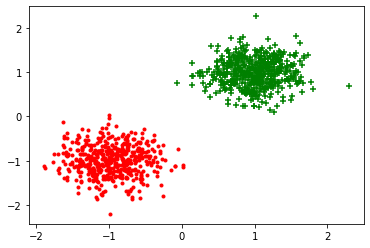

In [27]:
# Création du dataset
datax, datay = gen_arti(epsilon=0.1)

# On l'affiche en plot
plot_data(datax, datay)

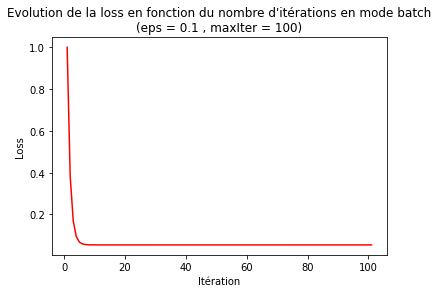

In [28]:
# Descente de gradient en batch - MSE
w, logW, logF = descente_gradient_batch(datax, datay, mse, mse_grad, eps=0.1, maxIter=100, plot=True)

On remarque que la loss diminue fortement au début puisque les variations au sein du vecteur **w** sont les plus importantes. Après un certain temps, on converge vers une loss nulle ce qui signifie une bonne classification des exemples. On réalise quelques expériences avec des valeurs de eps différentes et des modes de descente différents pour la  partie **Expérimentations**.

(PS. Le paramètre *plot* permet de demander l'affichage de la courbe d'évolution de la loss.)

## **Expérimentations**

In [29]:
# Paramètres différents
epsL = [0.001, 0.01, 0.1, 0.25]

# Taille des partitions (pour le mini-batch)
partL  = [5, 20, 50]

### **MSE - Mean Square Loss**
#### **Mode batch**

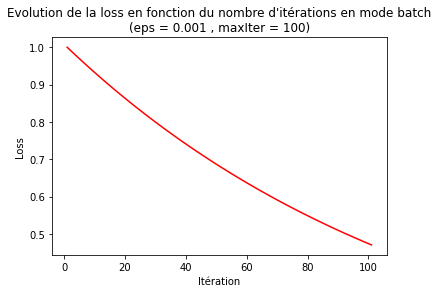

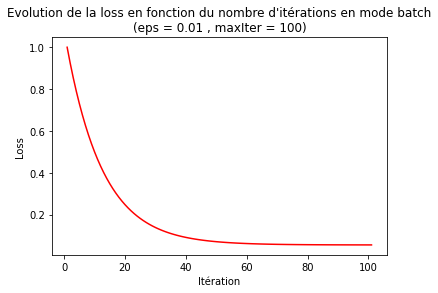

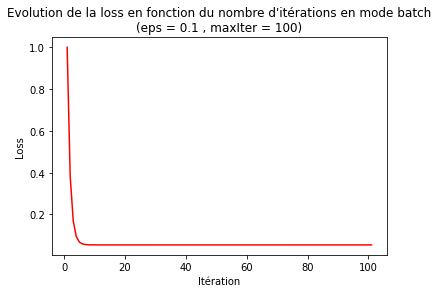

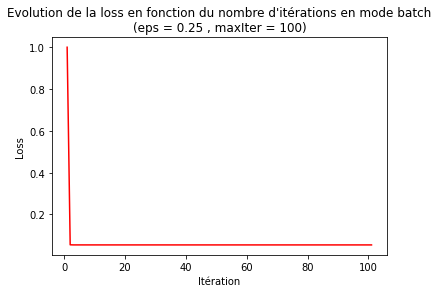

In [30]:
# On itère sur les différentes valeurs de eps
# Utilisation du mode batch
for e in epsL :
    _, _, _ = descente_gradient_batch(datax, datay, mse, mse_grad, eps=e, plot=True)

On remarque que quelque soit la valeur de sigma utilisée lors des expérimentations, la valeur de la loss diminue de telle sorte à converger vers 0, signifiant une bonne classification des données et le fait que les poids du vecteur **w** ne sont plus modifiés.
<br/>En mode batch, on réalise une correction sur toute les données donc on prend en compte tous les exemples mal classés à chaque itération jusqu'à obtenir un vecteur **w** assurant une bonne séparation des données. 

Les données utilisées étant tirées à partir de gaussiennes, il est normal que l'on puisse arriver à obtenir une loss nulle puisqu'il en théorie possible de tracer une frontière séparant les ensembles de chaque classe.

On essaye désormais la loss MSE avec cette fois-ci l'utilisation du mode stochastique pour la descente de gradient.

#### **Mode stochastique**

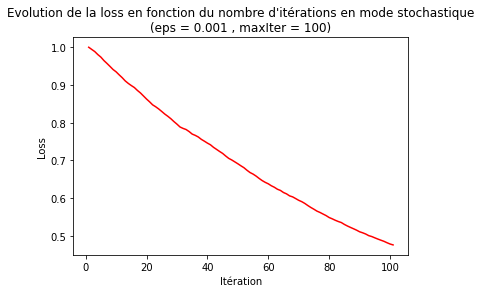

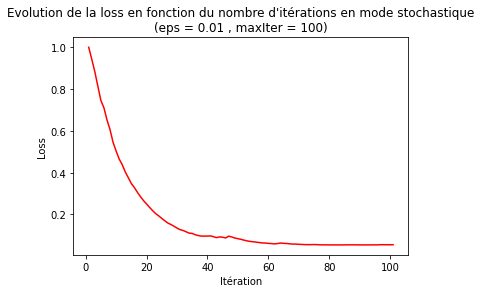

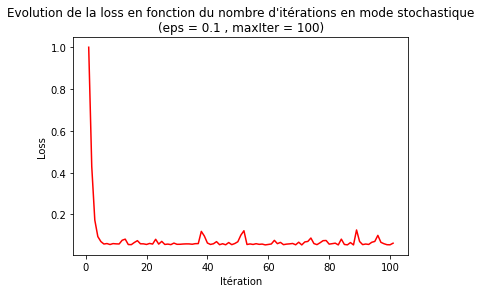

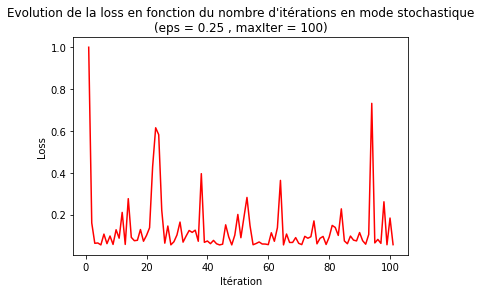

In [31]:
# On itère sur les différentes valeurs de eps
# Utilisation du mode stochastique
for e in epsL :
    _, _, _ = descente_gradient_stoch(datax, datay, mse, mse_grad, eps=e, plot=True)

En mode stochastique, on remarque l'évolution du gradient n'est pas continue; elle ne diminue pas constamment jusqu'à atteindre un minimum. 
<br/>La correction étant effectuée sur un exemple tiré aléatoirement, il est possible que les poids calculés classent moins bien les données après modification, ce qui explique que la loss puisse augmente et fur et à mesure des itérations.

La valeur de sigma joue un rôle bien plus important cette fois-çi puisque la correction étant effectuée sur un seul exemple, il est possible ques les poids de sigma varient brusquement d'une itération à l'autre lorsque la valeur de sigma est importante. On remarque celà avec les pics de loss majeurs, comme sur la dernière courbe tracée.

#### **Mode mini-batch**


#############################################################################
Partition de mini-batch de taille 5 
#############################################################################


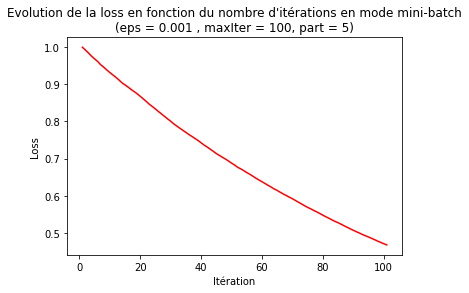

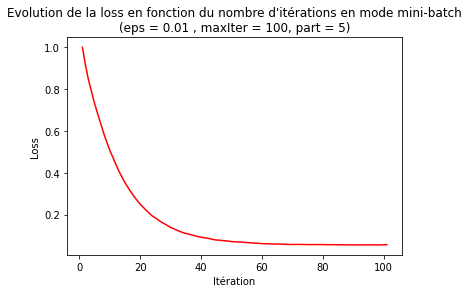

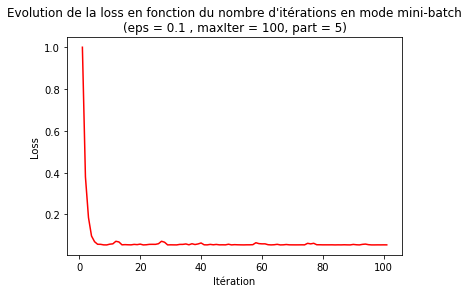

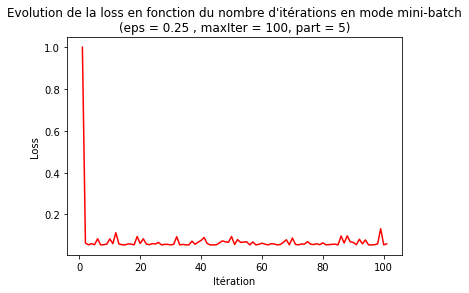


#############################################################################
Partition de mini-batch de taille 20 
#############################################################################


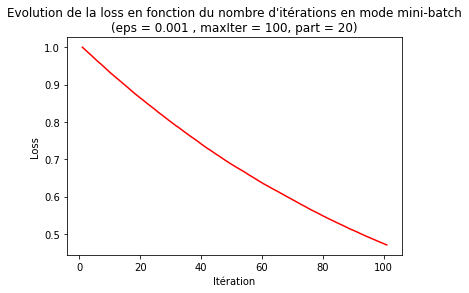

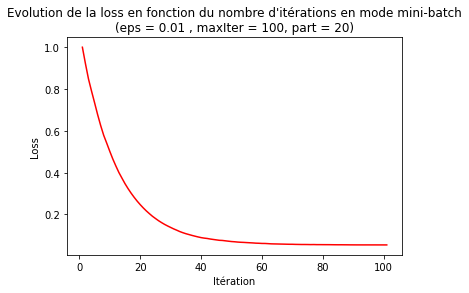

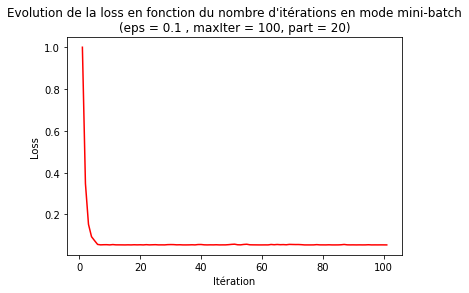

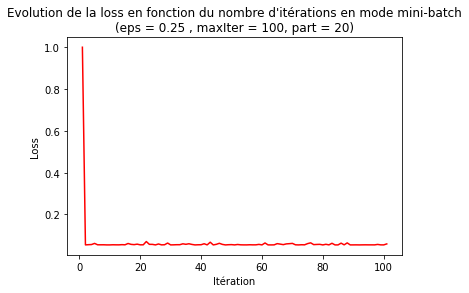


#############################################################################
Partition de mini-batch de taille 50 
#############################################################################


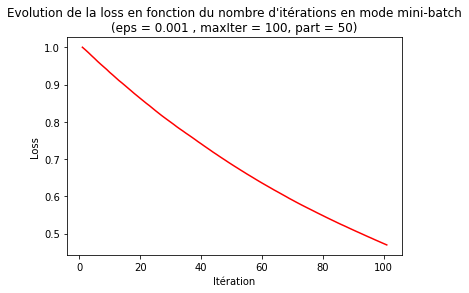

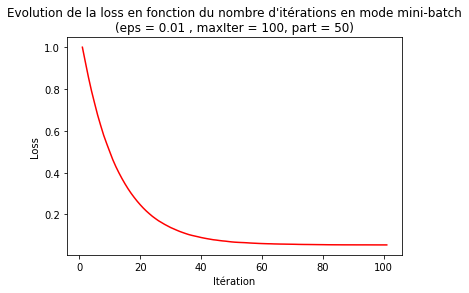

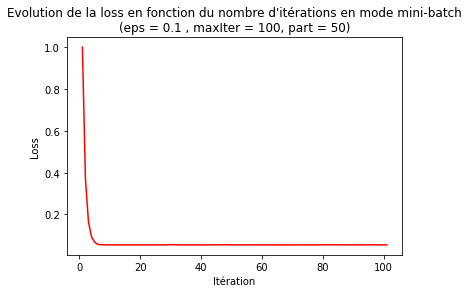

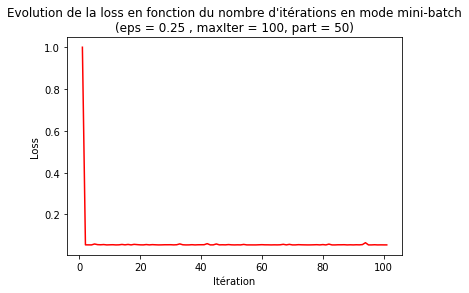

In [32]:
# On itère sur les différentes valeurs de eps
# Utilisation du mode batch
for p in partL :
    print("\n#############################################################################\nPartition de mini-batch de taille", p, "\n#############################################################################")
    for e in epsL :
        _, _, _ = descente_gradient_mini(datax, datay, mse, mse_grad, e, p, plot=True)

En mode mini-batch, on retrouve les 2 aspects du batch et du stochastique, ce qui est logique puisqu'il s'agit d'une fusion des 2 modèles.

La correction étant effectuée sur un sous-exemple des exemples dont la taille varie pendant les expérimentations, on remarque que lorsque la taille du sous-ensemble est faible, les courbes tracées sont relativement similaires au stochastique tandis que lorsque la taille du sous-ensemble est grande, les courbes sont similaires à celles du batch.

### **Régression Logistique**
#### **Mode batch**

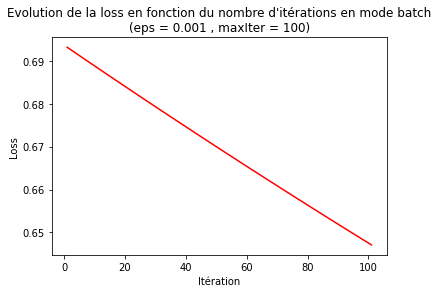

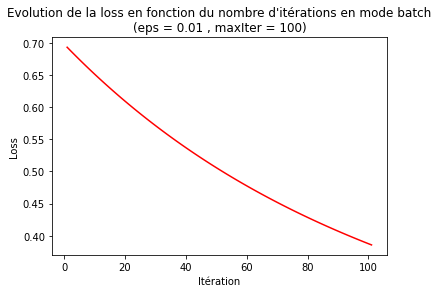

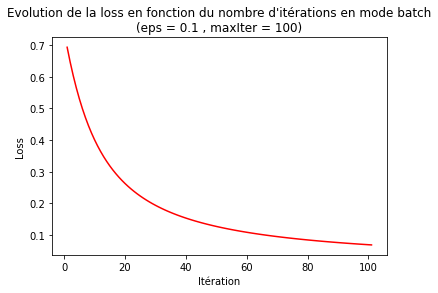

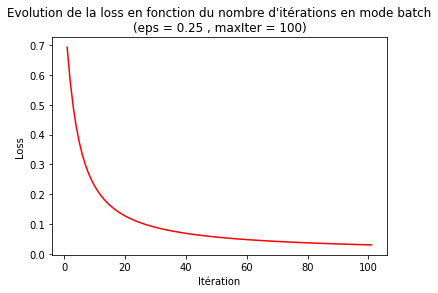

In [33]:
# Descente de gradient mode batch sur la regression logistique
# On itère sur les différentes valeurs de eps
# Utilisation du mode batch
for e in epsL :
    _, _, _ = descente_gradient_batch(datax, datay, reglog, reglog_grad, eps=e, plot=True)

#### **Mode stochastique**

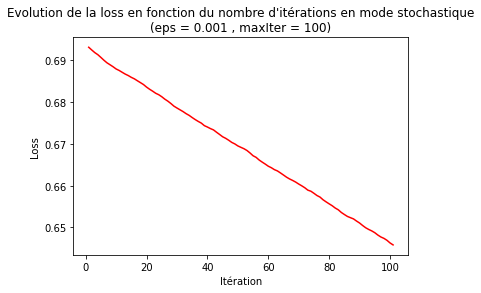

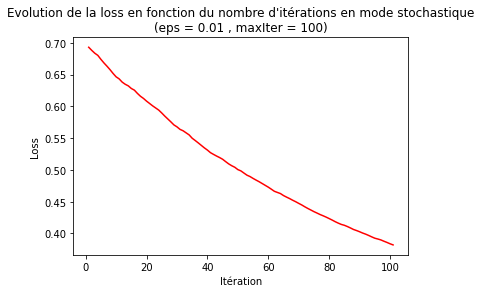

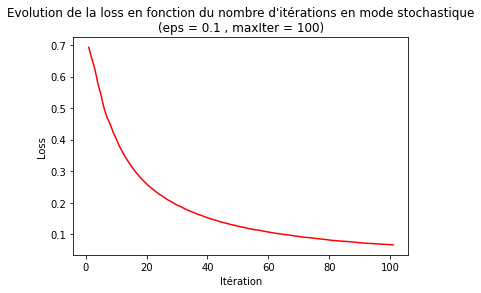

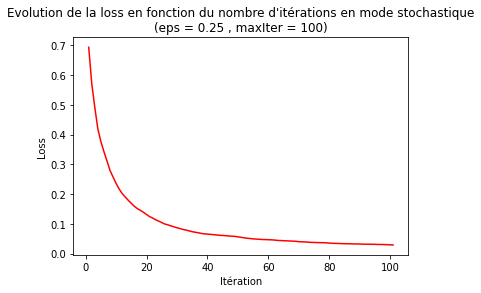

In [35]:
# On itère sur les différentes valeurs de eps
# Utilisation du mode stochastique
for e in epsL :
    _, _, _ = descente_gradient_stoch(datax, datay, reglog, reglog_grad, eps=e, plot=True)

#### **Mode mini-batch**


#############################################################################
Partition de mini-batch de taille 5 
#############################################################################


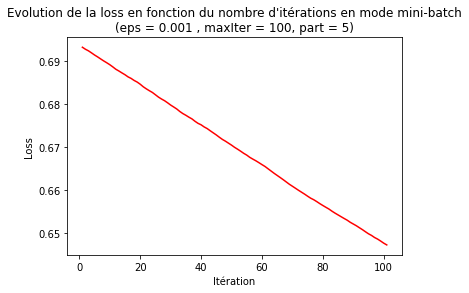

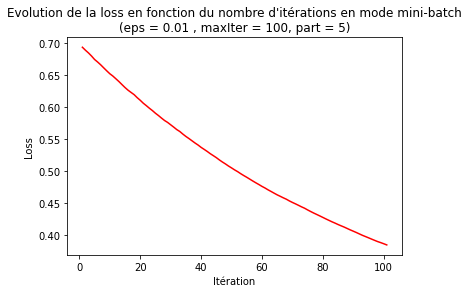

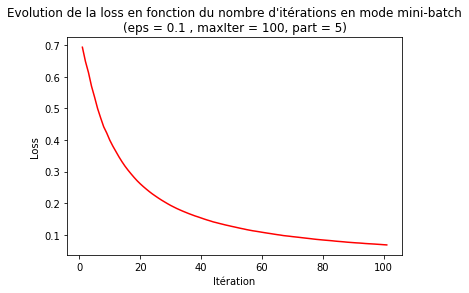

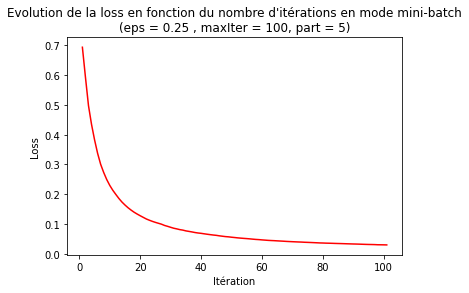


#############################################################################
Partition de mini-batch de taille 20 
#############################################################################


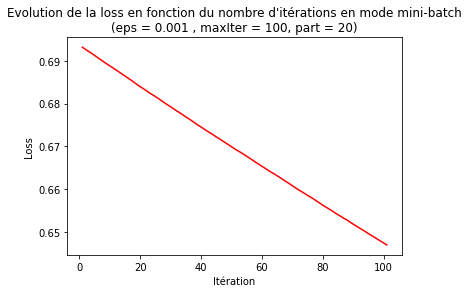

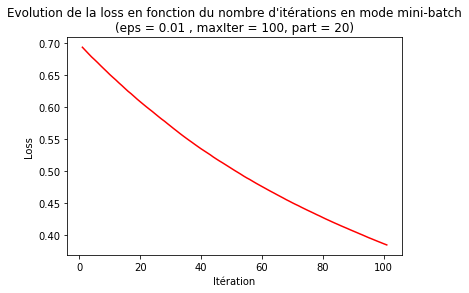

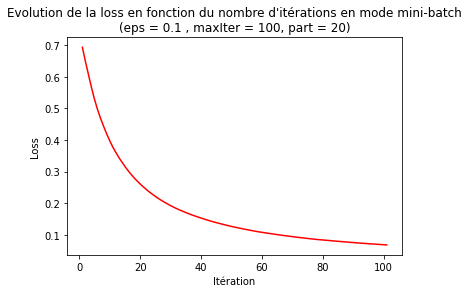

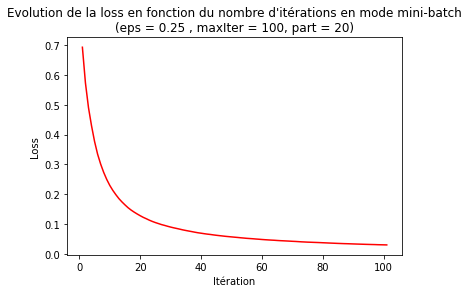


#############################################################################
Partition de mini-batch de taille 50 
#############################################################################


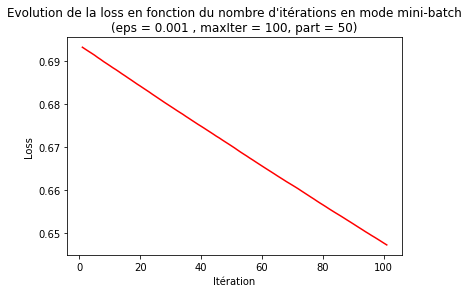

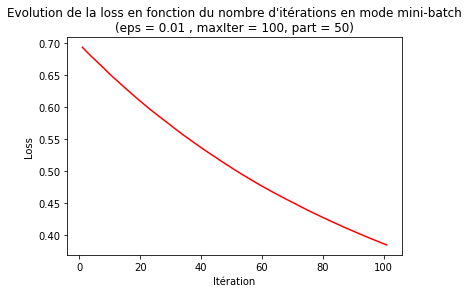

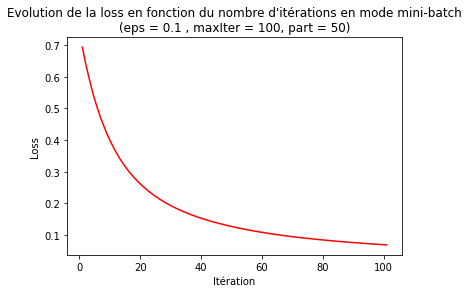

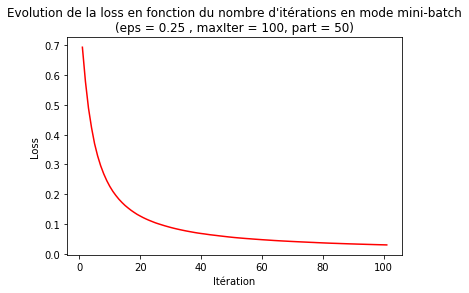

In [36]:
# On itère sur les différentes valeurs de eps
# Utilisation du mode batch
for p in partL :
    print("\n#############################################################################\nPartition de mini-batch de taille", p, "\n#############################################################################")
    for e in epsL :
        _, _, _ = descente_gradient_mini(datax, datay, reglog, reglog_grad, e, p, plot=True)

### **Affichage de frontières et données complexes**

Désormais, on utilise constamment un epsilon égal à **0.1** ainsi qu'un sous-ensemble de taille **N / 10** pour le mini-batch.

On affiche la représentation 2D des données, l'évolution de la fonction de coût ainsi qu'une frontière en fonction du w obtenu.

#### **Cas des 4 gaussiennes**

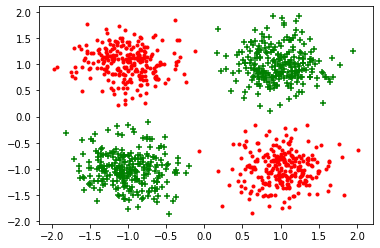

In [56]:
# Nouveau dataset 4 gaussiennes
datax, datay = gen_arti(data_type=1)
plot_data(datax, datay)

Mode batch - Gradient MSE


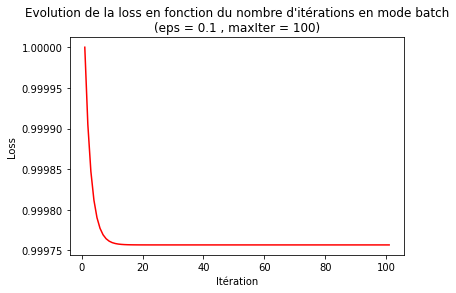

Mode batch - Gradient reglog


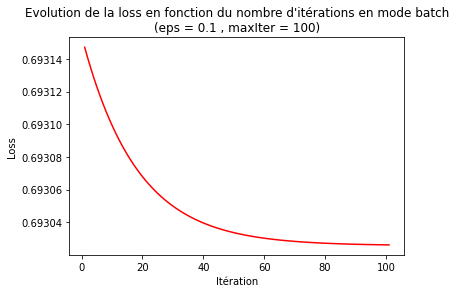

In [57]:
# Descente de gradient MSE avec mode batch
print("Mode batch - Gradient MSE")
w, wL, fL = descente_gradient_batch(datax, datay, mse, mse_grad, eps=0.1, plot=True)

# Descente de gradient reglog avec mode batch
print("Mode batch - Gradient reglog")
w, wL, fL = descente_gradient_batch(datax, datay, reglog, reglog_grad, eps=0.1, plot=True)

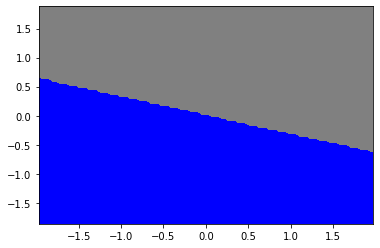

In [61]:
# On affiche une frontière
plot_frontiere(datax, lambda x : np.sign(x.dot(w.T)), step=100)

On remarque que cette frontière ne convient pas du tout pour séparer les données utilisées, ce qui est normal puisqu'en 2D, il est impossible de séparer linéairement les classes dans le cas des 4 gaussiennes. Il faudrait par exemple augmenter le nombre de dimensions afin de répondre au problème (x3 = x1 * x2, comme vu en cours).

#### **Cas de l'échiquier**

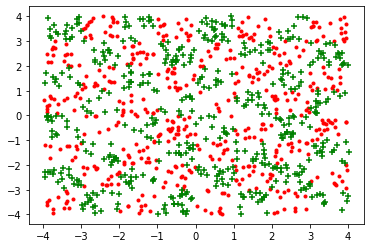

In [63]:
# Nouveau dataset échiquier
datax, datay = gen_arti(data_type=2)
plot_data(datax, datay)

Mode batch - Gradient MSE


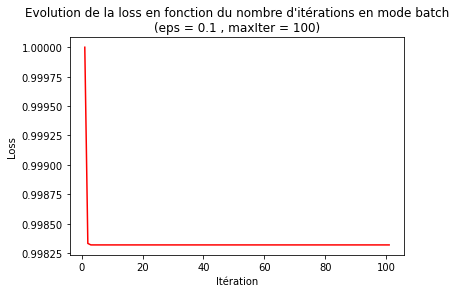

Mode batch - Gradient reglog


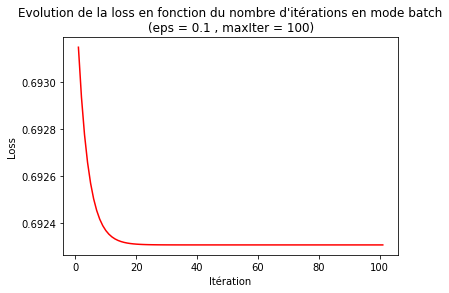

In [64]:
# Descente de gradient MSE avec mode batch
print("Mode batch - Gradient MSE")
w, wL, fL = descente_gradient_batch(datax, datay, mse, mse_grad, eps=0.1, plot=True)

# Descente de gradient reglog avec mode batch
print("Mode batch - Gradient reglog")
w, wL, fL = descente_gradient_batch(datax, datay, reglog, reglog_grad, eps=0.1, plot=True)

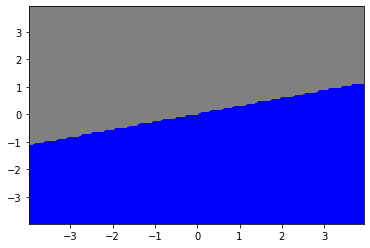

In [65]:
# On affiche une frontière
plot_frontiere(datax, lambda x : np.sign(x.dot(w.T)), step=100)

Même remarque pour l'échiquier, il est impossible de séparer linéairement ces données dans un monde 2D.

La loss avec le gradient MSE reste équivalente de 1 au fur et à mesure des itérations, soit sa valeur initiale, tandis qu'avec le gradient de la régression logistique, elle reste équivalente à 0,7.